In [1]:
!pip install gym

!pip install stable-baselines3==0.10.0  # You can specify a version that doesn't require shimmy



In [ ]:
import gym
from gym import spaces
import numpy as np

class JobSchedulingEnv(gym.Env):
    def __init__(self):
        super(JobSchedulingEnv, self).__init__()
        # Define the number of jobs and machines
        num_machines = 4
        num_tasks = 4 # Assuming a fixed number of tasks
        self.observation_space = spaces.Box(low=0, high=1, shape=(num_tasks, num_machines), dtype=np.float32)


        # Define state space
        self.state_space = spaces.Dict({
            "jobs": spaces.MultiDiscrete([num_machines] * num_jobs)
        })

        # Define action space - swapping tasks between machines
        self.action_space = spaces.Tuple((spaces.Discrete(num_jobs), spaces.Discrete(num_jobs)))

        # Initialize state with your provided initial state
        self.initial_state = {
            0: [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')],
            2: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]
        }
        self.state = self.initial_state.copy()

        # Initialize makespan and tool changeover time
        self.initial_makespan = 16
        self.initial_tool_changeover_time = 30

    def reset(self):
        self.state = self.initial_state.copy()
        return self.state

    def step(self, action):
        self.update_state(action)
        current_makespan = self.calculate_makespan()
        current_changeover_time = self.calculate_changeover_time()
        reward = self.calculate_reward(current_makespan, current_changeover_time)
        done = False  # Define your condition for ending an episode
        return self.state, reward, done, {}

    def update_state(self, action):
        # Swap tasks between machines based on action
        task1, task2 = action
        # Implement the swapping logic here

    def calculate_makespan(self):
        # Assuming each machine's tasks are stored in a list in the state
        # and each task is a tuple (task_id, duration, tool)
        max_duration = 0
        for machine, tasks in self.state.items():
            machine_duration = sum(task[1] for task in tasks)  # Sum of durations
            max_duration = max(max_duration, machine_duration)
        return max_duration


    def calculate_changeover_time(self):
        changeover_time = 0
        tool_change_time = 5  # Time taken for each tool change

        for machine, tasks in self.state.items():
            previous_tool = None
            for _, _, tool in tasks:
                if tool != previous_tool:
                    changeover_time += tool_change_time
                previous_tool = tool

        return changeover_time


    def calculate_reward(self, current_makespan, current_changeover_time):
        # Define the reward function
        if current_makespan + current_changeover_time < self.initial_makespan + self.initial_tool_changeover_time:
            return 5  # Good move
        else:
            return 0  # Not a good move

# Create the environment
env = JobSchedulingEnv()


In [ ]:
from stable_baselines3 import PPO

# Instantiate the agent
model = PPO("MlpPolicy", env, verbose=1)

# Train the agent
model.learn(total_timesteps=10000)

# Save the model
model.save("ppo_job_scheduling")


In [ ]:
# Load the trained model
model = PPO.load("ppo_job_scheduling")

# Test the model
obs = env.reset()
for _ in range(1000):
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, dones, info = env.step(action)
    if dones:
        break


In [12]:
import random
import copy

class GeneticAlgorithm:
    def __init__(self, initial_state, makespan, change_over_time):
        self.state = copy.deepcopy(initial_state)
        self.makespan = makespan
        self.change_over_time = change_over_time

    def calculateTaskTime(self, machine):
        return sum(x[1] for x in machine)

    def calculateChangeOverTime(self, machine):
        change_over_time = 0
        for i in range(1, len(machine)):
            if machine[i - 1][2] != machine[i][2]:
                change_over_time += self.change_over_time
        return change_over_time

    def calculateMakespan(self):
        return max(self.calculateTaskTime(self.state[x]) +
                   self.calculateChangeOverTime(self.state[x]) for x in self.state)

    def swapTasks(self):
        machine_keys = list(self.state.keys())
        machine1 = random.choice(machine_keys)
        machine2 = random.choice(machine_keys)

        if len(self.state[machine1]) > 0 and len(self.state[machine2]) > 0:
            task1 = random.choice(range(len(self.state[machine1])))
            task2 = random.choice(range(len(self.state[machine2])))
            self.state[machine1][task1], self.state[machine2][task2] = \
                self.state[machine2][task2], self.state[machine1][task1]

    def run(self, iterations=250):
        for _ in range(iterations):
            current_state = copy.deepcopy(self.state)
            current_makespan = self.calculateMakespan()
            self.swapTasks()
            if self.calculateMakespan() > current_makespan:
                self.state = current_state
        return self.state

if __name__ == '__main__':
    # Inputs
    initial_state = {
        0: [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')],
        1: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]
    }

    makespan = 16
    change_over_time = 30

    # Genetic Algorithm
    ga = GeneticAlgorithm(initial_state, makespan, change_over_time)
    optimized_schedule = ga.run()
    print("Optimized Schedule:")
    print(optimized_schedule)


Optimized Schedule:
{0: [('T21', 3, 'S1'), ('T91', 4, 'S1'), ('T41', 4, 'S1'), ('T61', 5, 'S2')], 1: [('T101', 1, 'S4'), ('T92', 4, 'S4'), ('T42', 4, 'S3'), ('T62', 5, 'S3')]}


In [14]:
import random
import copy

class GeneticAlgorithm:
    def __init__(self, initial_state, makespan, change_over_time):
        self.state = copy.deepcopy(initial_state)
        self.makespan = makespan
        self.change_over_time = change_over_time

    def calculateTaskTime(self, machine):
        return sum(x[1] for x in machine)

    def calculateChangeOverTime(self, machine):
        change_over_time = 0
        for i in range(1, len(machine)):
            if machine[i - 1][2] != machine[i][2]:
                change_over_time += self.change_over_time
        return change_over_time

    def calculateMakespan(self):
        return max(self.calculateTaskTime(self.state[x]) +
                   self.calculateChangeOverTime(self.state[x]) for x in self.state)

    def swapTasks(self):
        machine_keys = list(self.state.keys())
        machine1 = random.choice(machine_keys)
        machine2 = random.choice(machine_keys)

        if len(self.state[machine1]) > 0 and len(self.state[machine2]) > 0:
            task1 = random.choice(range(len(self.state[machine1])))
            task2 = random.choice(range(len(self.state[machine2])))
            self.state[machine1][task1], self.state[machine2][task2] = \
                self.state[machine2][task2], self.state[machine1][task1]

    def run(self, iterations=250):
        for _ in range(iterations):
            current_state = copy.deepcopy(self.state)
            current_makespan = self.calculateMakespan()
            self.swapTasks()
            if self.calculateMakespan() > current_makespan:
                self.state = current_state
        return self.state

if __name__ == '__main__':
    # Inputs
    initial_state = {
        0: [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')],
        1: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]
    }

    makespan = 0  # Initialize makespan
    change_over_time = 0  # Initialize changeover time

    previous_tool = {}  # To keep track of the previous tool for each machine

    for machine, tasks in initial_state.items():
        for task in tasks:
            task_name, task_duration, task_tool = task

            # Calculate changeover time for this task
            if machine in previous_tool and previous_tool[machine] != task_tool:
                change_over_time += 5  # Assuming 5 minutes for tool change

            # Update the previous tool for this machine
            previous_tool[machine] = task_tool

            # Update makespan based on task duration
            makespan += task_duration

    # Calculate previous total time
    previous_total_time = makespan + change_over_time

    print("Current Makespan:", makespan)
    print("Current Changeover Time:", change_over_time)
    print("Previous Total Time:", previous_total_time)

    # Genetic Algorithm
    ga = GeneticAlgorithm(initial_state, makespan, change_over_time)
    optimized_schedule = ga.run()

    # Calculate current total time
    current_total_time = ga.calculateMakespan()

    # Calculate percentage improvement
    improvement_percentage = ((previous_total_time - current_total_time) / previous_total_time) * 100

    print("Optimized Schedule:")
    print(optimized_schedule)
    print("Current Total Time:", current_total_time)
    print("Percentage Improvement:", improvement_percentage, "%")



Current Makespan: 30
Current Changeover Time: 30
Previous Total Time: 60
Optimized Schedule:
{0: [('T61', 5, 'S2'), ('T21', 3, 'S1'), ('T41', 4, 'S1'), ('T91', 4, 'S1')], 1: [('T101', 1, 'S4'), ('T92', 4, 'S4'), ('T62', 5, 'S3'), ('T42', 4, 'S3')]}
Current Total Time: 46
Percentage Improvement: 23.333333333333332 %


In [20]:
import random
import copy

class GeneticAlgorithm:
    def __init__(self, initial_state, makespan, change_over_time):
        self.state = copy.deepcopy(initial_state)
        self.makespan = makespan
        self.change_over_time = change_over_time

    def calculateTaskTime(self, machine):
        return sum(x[1] for x in machine)

    def calculateChangeOverTime(self, machine):
        change_over_time = 0
        for i in range(1, len(machine)):
            if machine[i - 1][2] != machine[i][2]:
                change_over_time += self.change_over_time
        return change_over_time

    def calculateMakespan(self):
        return max(self.calculateTaskTime(self.state[x]) +
                   self.calculateChangeOverTime(self.state[x]) for x in self.state)

    def swapTasks(self):
        machine_keys = list(self.state.keys())
        machine1 = random.choice(machine_keys)
        machine2 = random.choice(machine_keys)

        if len(self.state[machine1]) > 0 and len(self.state[machine2]) > 0:
            task1 = random.choice(range(len(self.state[machine1])))
            task2 = random.choice(range(len(self.state[machine2])))
            self.state[machine1][task1], self.state[machine2][task2] = \
                self.state[machine2][task2], self.state[machine1][task1]

    def run(self, iterations=600):
        for _ in range(iterations):
            current_state = copy.deepcopy(self.state)
            current_makespan = self.calculateMakespan()
            self.swapTasks()
            if self.calculateMakespan() > current_makespan:
                self.state = current_state
        return self.state

if __name__ == '__main__':
    # Inputs
    initial_state = {
        0: [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')],
        1: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]
    }

    makespan = 0  # Initialize makespan
    change_over_time = 0  # Initialize changeover time

    previous_tool = {}  # To keep track of the previous tool for each machine

    for machine, tasks in initial_state.items():
        for task in tasks:
            task_name, task_duration, task_tool = task

            # Calculate changeover time for this task
            if machine in previous_tool and previous_tool[machine] != task_tool:
                change_over_time += 5  # Assuming 5 minutes for tool change

            # Update the previous tool for this machine
            previous_tool[machine] = task_tool

            # Update makespan based on task duration
            makespan += task_duration

    # Calculate previous total time
    previous_total_time = makespan + change_over_time

    print("Current Makespan:", makespan)
    print("Current Changeover Time:", change_over_time)
    print("Previous Total Time:", previous_total_time)

    # Genetic Algorithm
    ga = GeneticAlgorithm(initial_state, makespan, change_over_time)
    optimized_schedule = ga.run()

    # Calculate current total time
    current_total_time = ga.calculateMakespan()

    # Calculate percentage improvement
    improvement_percentage = ((previous_total_time - current_total_time) / previous_total_time) * 100

    print("Optimized Schedule:")
    print(optimized_schedule)
    print("Current Total Time:", current_total_time)
    print("Percentage Improvement:", improvement_percentage, "%")



Current Makespan: 30
Current Changeover Time: 30
Previous Total Time: 60
Optimized Schedule:
{0: [('T61', 5, 'S2'), ('T41', 4, 'S1'), ('T91', 4, 'S1'), ('T21', 3, 'S1')], 1: [('T42', 4, 'S3'), ('T62', 5, 'S3'), ('T101', 1, 'S4'), ('T92', 4, 'S4')]}
Current Total Time: 46
Percentage Improvement: 23.333333333333332 %


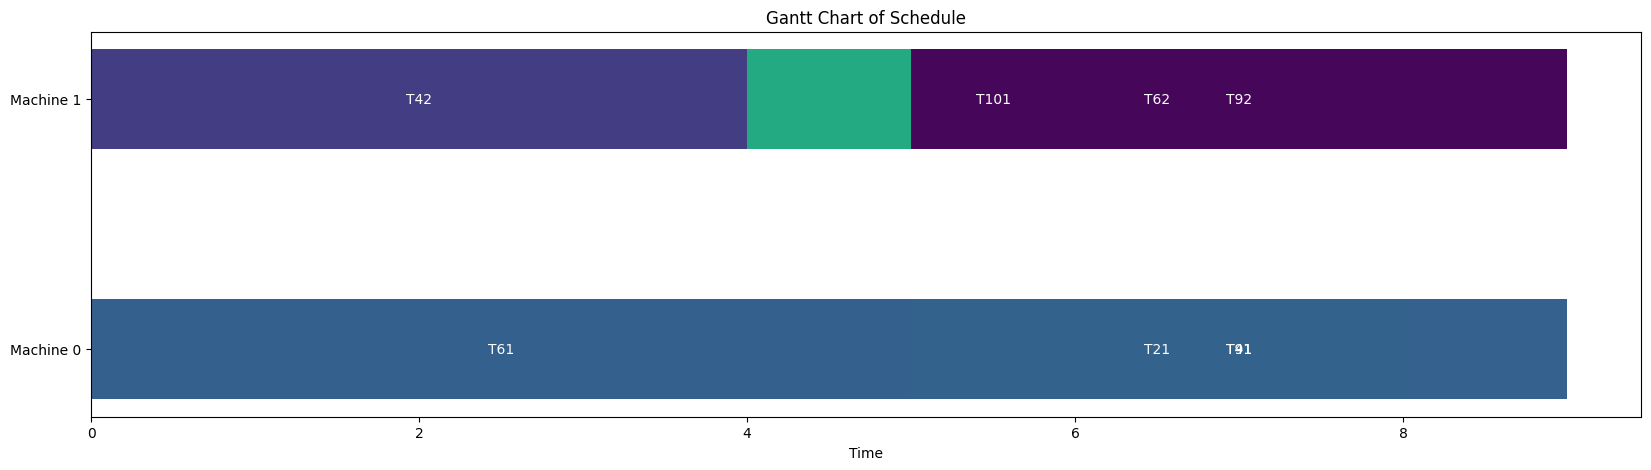

In [21]:
import matplotlib.pyplot as plt
import random

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots(figsize=(20, 5))

    machine_labels = list(schedule.keys())
    task_height = 0.4
    task_colors = {}  # Dictionary to store task colors

    for i, machine in enumerate(machine_labels):
        tasks = schedule[machine]
        for task in tasks:
            task_name, task_duration, tool = task

            # Assign a unique color to each task name
            if task_name not in task_colors:
                task_colors[task_name] = plt.cm.viridis(random.random())

            start_time = max([0] + [end_time for _, end_time, _ in tasks[:tasks.index(task)]])

            ax.barh(i, task_duration, left=start_time, height=task_height, color=task_colors[task_name])
            ax.text(start_time + task_duration / 2, i, task_name, ha='center', va='center', color='white')

    ax.set_yticks(range(len(machine_labels)))
    ax.set_yticklabels([f'Machine {machine}' for machine in machine_labels])
    ax.set_xlabel('Time')
    ax.set_title('Gantt Chart of Schedule')

    plt.show()

# Sample schedule
sample_schedule = optimized_schedule

# Plot the Gantt chart
plot_gantt_chart(sample_schedule)


In [15]:
def calculate_start_end_times(schedule):
    start_end_times = {}
    for machine, tasks in schedule.items():
        time = 0
        for task in tasks:
            start_time = time
            time += task[1]  # task[1] is the duration of the task
            end_time = time
            start_end_times[task[0]] = (start_time, end_time)
    return start_end_times

def validate_schedule(schedule):
    start_end_times = calculate_start_end_times(schedule)
    total_tasks = sum(len(tasks) for tasks in schedule.values())
    mismatches = 0

    for machine_tasks in schedule.values():
        for i, task in enumerate(machine_tasks):
            if i > 0:  # Skip the first task in each machine's list
                current_task_id = task[0]
                dependent_task_id = f'T{current_task_id[1:-1]}{int(current_task_id[-1]) - 1}'

                if dependent_task_id in start_end_times:
                    dependent_task_end_time = start_end_times[dependent_task_id][1]
                    current_task_start_time = start_end_times[current_task_id][0]

                    if dependent_task_end_time > current_task_start_time:
                        mismatches += 1

    fitness = ((total_tasks - mismatches) / total_tasks) * 100
    return fitness

# Proposed schedule
proposed_schedule = optimized_schedule

# Validate the schedule and calculate fitness
schedule_fitness = validate_schedule(proposed_schedule)
print("Fitness of the proposed schedule:", schedule_fitness, "%")


Fitness of the proposed schedule: 100.0 %


In [46]:
import random
import copy


class GeneticAlgorithm:
    def __init__(self, initial_state, makespan, change_over_time):
        self.state = copy.deepcopy(initial_state)
        self.makespan = makespan
        self.change_over_time = change_over_time

    def calculateTaskTime(self, machine):
        return sum(x[1] for x in machine)

    def calculateChangeOverTime(self, machine):
        change_over_time = 0
        for i in range(1, len(machine)):
            if machine[i - 1][2] != machine[i][2]:
                change_over_time += self.change_over_time
        return change_over_time

    def calculateMakespan(self):
        return max(
            self.calculateTaskTime(self.state[x])
            + self.calculateChangeOverTime(self.state[x])
            for x in self.state
        )

    def swapTasks(self):
        machine_keys = list(self.state.keys())
        machine1 = random.choice(machine_keys)
        machine2 = random.choice(machine_keys)

        if len(self.state[machine1]) > 0 and len(self.state[machine2]) > 0:
            task1 = random.choice(range(len(self.state[machine1])))
            task2 = random.choice(range(len(self.state[machine2])))
            self.state[machine1][task1], self.state[machine2][task2] = (
                self.state[machine2][task2],
                self.state[machine1][task1],
            )

    def calculate_start_end_times(self):
        start_end_times = {}
        for machine, tasks in self.state.items():
            time = 0
            for task in tasks:
                start_time = time
                time += task[1]  # task[1] is the duration of the task
                end_time = time
                start_end_times[task[0]] = (start_time, end_time)
        return start_end_times

    def validate_schedule(self):
        start_end_times = self.calculate_start_end_times()
        total_tasks = sum(len(tasks) for tasks in self.state.values())
        mismatches = 0

        for machine_tasks in self.state.values():
            for i, task in enumerate(machine_tasks):
                if i > 0:  # Skip the first task in each machine's list
                    current_task_id = task[0]
                    dependent_task_id = (
                        f"T{current_task_id[1:-1]}{int(current_task_id[-1]) - 1}"
                    )

                    if dependent_task_id in start_end_times:
                        dependent_task_end_time = start_end_times[dependent_task_id][1]
                        current_task_start_time = start_end_times[current_task_id][0]

                        if dependent_task_end_time > current_task_start_time:
                            mismatches += 1

        fitness = ((total_tasks - mismatches) / total_tasks) * 100
        return fitness

    def run(self, iterations=500):
        best_state = copy.deepcopy(self.state)
        best_fitness = self.validate_schedule()

        for _ in range(iterations):
            current_state = copy.deepcopy(self.state)
            current_makespan = self.calculateMakespan()
            self.swapTasks()
            new_fitness = self.validate_schedule()

            if (
                new_fitness >= best_fitness
                and self.calculateMakespan() <= current_makespan
            ):
                best_state = copy.deepcopy(self.state)
                best_fitness = new_fitness
            else:
                self.state = current_state

        self.state = best_state
        return self.state

if __name__ == "__main__":
    # Inputs
    initial_state = {
        0: [("T41", 4, "S1"), ("T42", 4, "S3"), ("T91", 4, "S1"), ("T92", 4, "S4")],
        1: [
            ("T21", 3, "S1"),
            ("T61", 5, "S2"),
            ("T62", 5, "S3"),
            ("T101", 1, "S4"),
        ],
    }

    makespan = 0  # Initialize makespan
    change_over_time = 0  # Initialize changeover time

    # Initialize changeover time and makespan based on initial state
    previous_tool = {}  # To keep track of the previous tool for each machine
    for machine, tasks in initial_state.items():
        for task in tasks:
            task_name, task_duration, task_tool = task
            if machine in previous_tool and previous_tool[machine] != task_tool:
                change_over_time += 5  # Assuming 5 minutes for tool change
            previous_tool[machine] = task_tool
            makespan += task_duration

    # Calculate previous total time
    previous_total_time = makespan + change_over_time

    print("Initial Makespan:", makespan)
    print("Initial Changeover Time:", change_over_time)
    print("Initial Total Time:", previous_total_time)

    # Run Genetic Algorithm
    ga = GeneticAlgorithm(initial_state, makespan, change_over_time)
    optimized_schedule = ga.run()

    # Calculate current total time and fitness
    current_total_time = ga.calculateMakespan()
    final_fitness = ga.validate_schedule()

    print("Optimized Schedule:")
    print(optimized_schedule)
    print("Current Total Time:", current_total_time)
    print("Fitness of the Optimized Schedule:", final_fitness)


Initial Makespan: 30
Initial Changeover Time: 30
Initial Total Time: 60
Optimized Schedule:
{0: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T92', 4, 'S4'), ('T101', 1, 'S4')], 1: [('T91', 4, 'S1'), ('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T62', 5, 'S3')]}
Current Total Time: 73
Fitness of the Optimized Schedule: 100.0


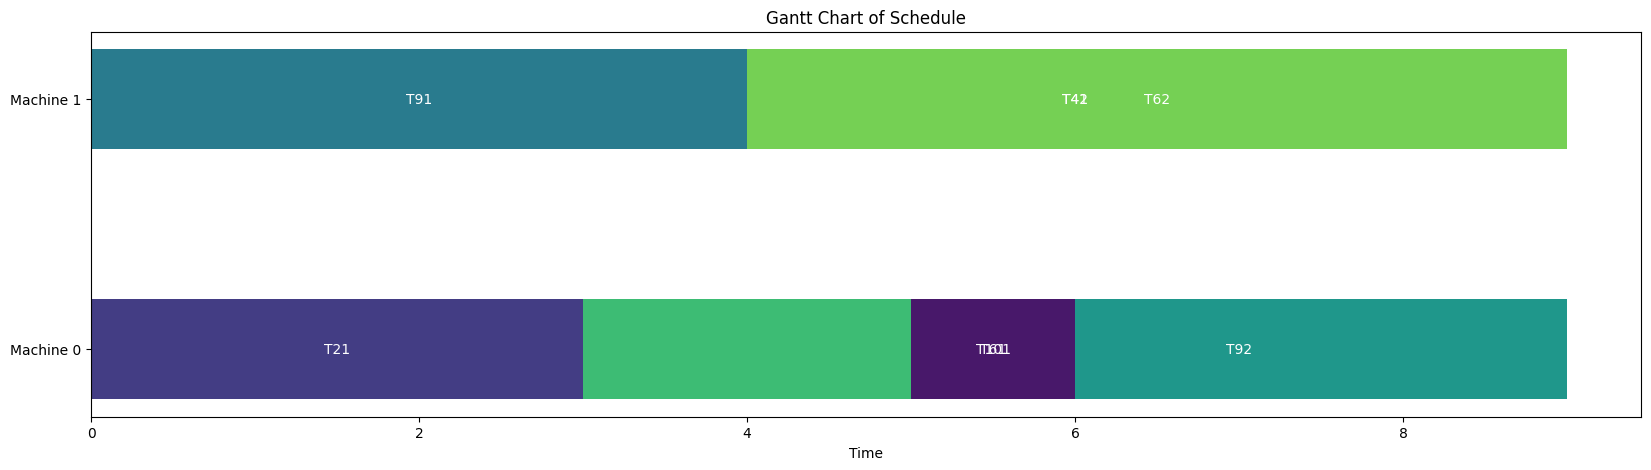

In [47]:
import matplotlib.pyplot as plt
import random

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots(figsize=(20, 5))

    machine_labels = list(schedule.keys())
    task_height = 0.4
    task_colors = {}  # Dictionary to store task colors

    for i, machine in enumerate(machine_labels):
        tasks = schedule[machine]
        for task in tasks:
            task_name, task_duration, tool = task

            # Assign a unique color to each task name
            if task_name not in task_colors:
                task_colors[task_name] = plt.cm.viridis(random.random())

            start_time = max([0] + [end_time for _, end_time, _ in tasks[:tasks.index(task)]])

            ax.barh(i, task_duration, left=start_time, height=task_height, color=task_colors[task_name])
            ax.text(start_time + task_duration / 2, i, task_name, ha='center', va='center', color='white')

    ax.set_yticks(range(len(machine_labels)))
    ax.set_yticklabels([f'Machine {machine}' for machine in machine_labels])
    ax.set_xlabel('Time')
    ax.set_title('Gantt Chart of Schedule')

    plt.show()

# Sample schedule
sample_schedule = optimized_schedule

# Plot the Gantt chart
plot_gantt_chart(sample_schedule)


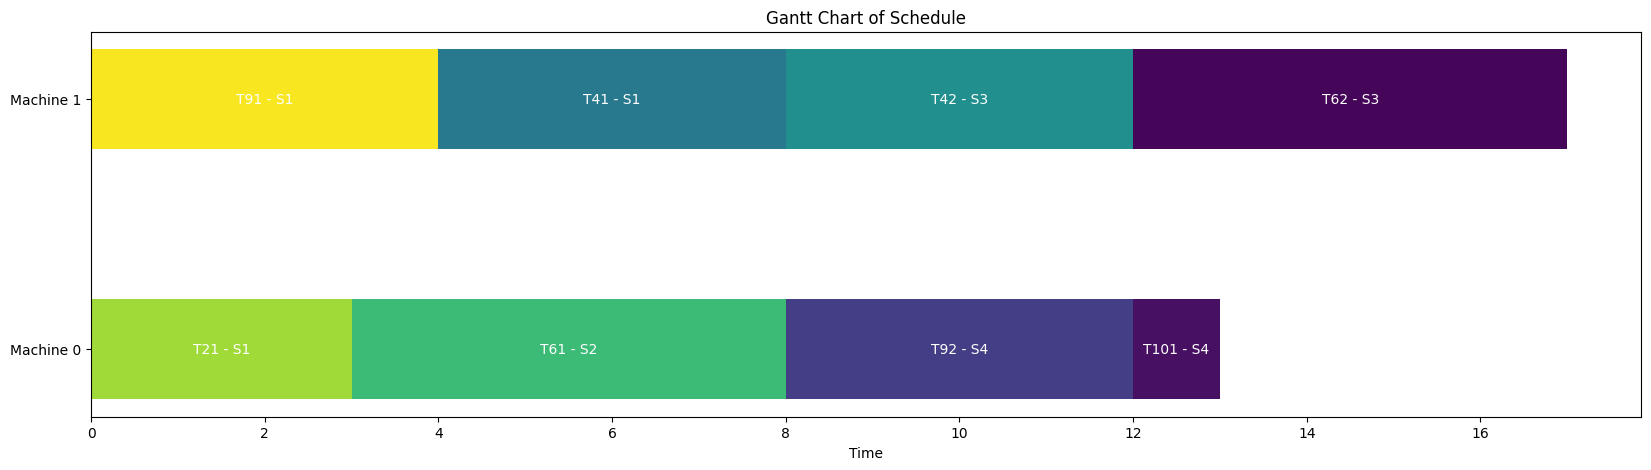

In [59]:
import matplotlib.pyplot as plt
import random

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots(figsize=(20, 5))

    machine_labels = list(schedule.keys())
    task_height = 0.4
    task_colors = {}  # Dictionary to store task colors
    min_label_duration = 1  # Minimum duration to show the label inside the bar

    for i, machine in enumerate(machine_labels):
        tasks = schedule[machine]
        cumulative_duration = 0  # To track the end time of the last task
        for task in tasks:
            task_name, task_duration, tool = task
            full_task_name = f"{task_name} - {tool}"  # Combining task name and tool name

            # Assign a unique color to each full task name
            if full_task_name not in task_colors:
                task_colors[full_task_name] = plt.cm.viridis(random.random())

            start_time = cumulative_duration
            cumulative_duration += task_duration  # Update for next task

            ax.barh(i, task_duration, left=start_time, height=task_height, color=task_colors[full_task_name])

            # Label placement
            if task_duration >= min_label_duration:
                # Place label inside the bar
                ax.text(start_time + task_duration / 2, i, full_task_name, ha='center', va='center', color='white')
            else:
                # Place label outside the bar for very short tasks
                ax.text(start_time + task_duration + 0.5, i, full_task_name, ha='left', va='center', color='black')

    ax.set_yticks(range(len(machine_labels)))
    ax.set_yticklabels([f'Machine {machine}' for machine in machine_labels])
    ax.set_xlabel('Time')
    ax.set_title('Gantt Chart of Schedule')

    plt.show()

# Sample schedule
sample_schedule = optimized_schedule

# Plot the Gantt chart
plot_gantt_chart(sample_schedule)

